# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1:</center>
### <center>  Propiedades en Venta</center>
### <center>  Grupo 18</center>


#### **Integrantes:**

* Analía Acevedo
* Santiago Daniel Marczewski Neudeck
* Lucia Belén Napoli
* Brayan Ricaldi

#### **Introducción**

En este trabajo práctico se propone que cada grupo de alumnos se enfrente a un problema real
de ciencia de datos, que trabaje en cada una de las etapas del proceso y que pueda resolverlo
aplicando los contenidos que vemos en la materia.

Vamos a utilizar el conjunto de datos provisto por la empresa [Properati](https://www.properati.com.ar/) correspondiente a anuncios de propiedades en venta de la República Argentina publicados durante el año 2021 .
La información fue extraída desde BigQuery (producto de Google Cloud para consultar grandes
volúmenes de datos) donde la empresa disponibiliza sus datasets con avisos de propiedades y
desarrollos inmobiliarios que están y estuvieron publicados en Properati en todo Latinoamérica
desde 2015 hasta dos meses atrás. Los datos se actualizan diariamente para mayor información
pueden consultar el siguiente [link](https://www.properati.com.ar/data/).

El objetivo principal del trabajo será aplicar técnicas de análisis exploratorio, preprocesamiento
de datos, agrupamiento, clasificación y regresión. En la sección enunciado se detallan los
objetivos particulares.

#### **Descargamos en DataSet**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.options.display.max_columns = None

In [3]:
url='https://drive.google.com/file/d/1wScqb_M8lq3yL3ZfSZvnLyZbh4ImI7dI/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dp_properity = pd.read_csv(url)

In [4]:
df = dp_properity.copy()

In [5]:
df.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


In [6]:
df.shape

(460154, 20)

#### **Enunciado**
El conjunto de datos a utilizar properati_argentina_2021 se encuentra disponible en el
siguiente [enlace](https://drive.google.com/drive/folders/1BPCdW_Jab91WhMqfXcf0jYMHzjxW_XkD?usp=sharing), la descripción de las variables se encuentra disponible [aquí](https://www.properati.com.ar/data/). Para este trabajo
se plantean los siguientes objetivos generales:

* _Agrupamiento_: el objetivo será analizar si es posible agrupar los datos en función de
algún criterio, identificando a qué obedece el mismo.

* _Clasificación_: el objetivo será clasificar cada anuncio en tres categorías relacionadas al
precio de venta (alto, medio y bajo).

* _Regresión_: el objetivo será predecir el precio de venta en dólares de una propiedad tipo
vivienda ubicada en Capital Federal.

A continuación se detallan las etapas que deben ser desarrolladas en el trabajo:

### **1. Análisis Exploratorio y Preprocesamiento de Datos**
El primer paso consiste en la selección de los datos que se van a utilizar, se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).
Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

<h4 align="center"><b> Filtro por el enunciado </b></h4>

Solo me quedo con las longitudes y latitudes que pertenezcan a capital federal

In [7]:
df = df[(-58.5314375 < df['longitud']) & (df['longitud'] < -58.3415625)]
df = df[(-34.7045625 < df['latitud']) & (df['latitud'] < -34.5270625)]

In [8]:
df

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
44,IfZHM0GX583/RU9QQb8Orw==,2021-09-09,2022-03-09,2021-09-09,-34.599506,-58.404138,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,2.0,1.0,43.0,43.0,NaN,NaN,Av Puyrredon al 924
45,Mx49Yw80/GoctG8iFRmB0Q==,2021-09-09,2021-11-12,2021-09-09,-34.604842,-58.402267,Capital Federal,Once,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,165.0,165.0,145000.0,ARS,"LARREA Y CORRIENTES LOCAL 4,50X15"
46,C+53mNkciTvqvGFT8RY1gQ==,2021-09-09,2021-11-12,2021-09-09,-34.604842,-58.402267,Capital Federal,Once,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,165.0,165.0,145000.0,ARS,"LARREA Y CORRIENTES LOCAL 4,50X15"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460132,vSw/lgE8SKDdoG3SW9QEMA==,2021-01-05,9999-12-31,2021-01-05,-34.615127,-58.370849,Capital Federal,San Telmo,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,NaN,1006.0,11500.0,USD,Edificio Comercial - San Telmo
460141,rgy9pDbq1KQFYT2YlDJFKA==,2021-01-05,2021-01-06,2021-01-05,-34.600027,-58.372700,Capital Federal,San Nicolás,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,220.0,220.0,250000.0,ARS,LOCAL VARIOS DESTINOS Reconquista y Viamonte
460142,jo1m9uh6eejHp2VGi5dTJw==,2021-01-05,9999-12-31,2021-01-05,-34.602301,-58.375143,Capital Federal,San Nicolás,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,NaN,120.0,145000.0,ARS,Local - San Nicolas
460144,awisQ32qAFbhfeEzMYzjdQ==,2021-01-05,2021-02-09,2021-01-05,-34.573097,-58.483985,Capital Federal,Villa Urquiza,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,54.0,56.0,55000.0,ARS,Local - Villa Urquiza


In [9]:
df.shape

(158431, 20)

**a) Exploración Inicial:** analizar cada variable, considerando los siguientes aspectos
* Tipo de variable
* Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1,
q3, moda.
* Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada
uno.
* Determinar variables irrelevantes en el análisis (Ids por ejemplo)
* Realizar un análisis gráfico de las distribuciones de las variables
* Analizar las correlaciones existentes entre las variables.

A partir de este análisis generar conclusiones sobre los datos.



<h4 align="center"><b> Tipo de variable </b></h4>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158431 entries, 42 to 460145
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        158431 non-null  object 
 1   start_date                158431 non-null  object 
 2   end_date                  158431 non-null  object 
 3   created_on                158431 non-null  object 
 4   latitud                   158431 non-null  float64
 5   longitud                  158431 non-null  float64
 6   place_l2                  158431 non-null  object 
 7   place_l3                  158349 non-null  object 
 8   place_l4                  12888 non-null   object 
 9   place_l5                  0 non-null       object 
 10  place_l6                  0 non-null       float64
 11  operation                 158431 non-null  object 
 12  property_type             158431 non-null  object 
 13  property_rooms            138131 non-null  

In [11]:
dic = {'object':0,  'float': 0}
f_float = []
f_object = []

for f in dp_properity.columns:
    if df[f].dtype == 'O': 
        f_object.append(f)
        dic['object'] = dic.get('object', 0) + 1 
    if df[f].dtype == 'float': 
        f_float.append(f)
        dic['float'] = dic.get('float', 0) + 1
    
df_type = pd.DataFrame()
df_type['Type'] = None
for key in dic:
    df_type.loc[key] = [dic[key]]

In [12]:
df_type

,Type
object,12
float,8


Se observa que hay 12 variables string y 8 float

<h4 align="center"><b> Feature fechas </b></h4>

In [13]:
'''
Precondicion: 
        - f debe ser un feature de df.
        - Los datos de f son del formato yy-mm-dd
        - yy/mm/dd son int en formato string
'''

def procesar_fechas(df, f):
    day = []
    month = []
    year = []
    for date in df[f]:
        _year, _month, _day = date.split('-')
        day.append(int(_day))
        month.append(int(_month))
        year.append(int(_year))
    return day, month, year

In [14]:
start_date_day, start_date_month, start_date_year = procesar_fechas(df, 'start_date')
df['start_date_day'] = start_date_day
df['start_date_month'] = start_date_month
df['start_date_year'] = start_date_year

In [15]:
end_date_day, end_date_month, end_date_year = procesar_fechas(df, 'end_date')
df['end_date_day'] = end_date_day
df['end_date_month'] = end_date_month
df['end_date_year'] = end_date_year

In [16]:
created_on_day, created_on_month, created_on_year = procesar_fechas(df, 'created_on')
df['created_on_day'] = created_on_day
df['created_on_month'] = created_on_month
df['created_on_year'] = created_on_year

<h4 align="center"><b> Variables Cuantitativas: calcular medidas de resumen: media, mediana, q1,
q3, moda. </b></h4>

In [17]:
df.describe()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,start_date_day,start_date_month,start_date_year,end_date_day,end_date_month,end_date_year,created_on_day,created_on_month,created_on_year
count,158431.000000,158431.000000,0.0,138131.000000,118581.000000,146751.000000,1.502950e+05,1.558480e+05,158431.000000,158431.000000,158431.0,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.0
mean,-34.596838,-58.433573,NaN,2.762783,1.987974,157.774257,1.754113e+02,2.110255e+05,15.383018,6.450714,2021.0,15.205376,5.787258,2379.591608,15.383018,6.450714,2021.0
std,0.029931,0.040972,NaN,1.560842,1.520543,1146.983627,1.105703e+04,1.025256e+06,8.500304,3.403622,0.0,9.666737,3.430597,1652.340760,8.500304,3.403622,0.0
min,-34.704559,-58.531429,NaN,1.000000,-2.000000,10.000000,1.000000e+00,0.000000e+00,1.000000,1.000000,2021.0,1.000000,1.000000,2021.000000,1.000000,1.000000,2021.0
25%,-34.614876,-58.463515,NaN,2.000000,1.000000,44.000000,4.000000e+01,5.500000e+04,8.000000,3.000000,2021.0,5.000000,3.000000,2021.000000,8.000000,3.000000,2021.0
50%,-34.596103,-58.432834,NaN,3.000000,2.000000,66.000000,5.900000e+01,1.100000e+05,16.000000,6.000000,2021.0,14.000000,6.000000,2021.000000,16.000000,6.000000,2021.0
75%,-34.577630,-58.400925,NaN,3.000000,3.000000,119.000000,1.020000e+02,1.990000e+05,23.000000,9.000000,2021.0,25.000000,8.000000,2022.000000,23.000000,9.000000,2021.0
max,-34.527075,-58.341617,NaN,40.000000,144.000000,137000.000000,4.234164e+06,2.300000e+08,31.000000,12.000000,2021.0,31.000000,12.000000,9999.000000,31.000000,12.000000,2021.0


In [18]:
df[f_float].mode()

,latitud,longitud,place_l6,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
0,-34.619406,-58.451999,NaN,2.0,1.0,40.0,40.0,35000.0


<h4 align="center"><b> Variables Cualitativas mostrar cantidad de valores posibles, y frecuencias de cada
uno </b></h4>

<h5 style="color:#FF0000"> Tarea de cada uno. <br> Luego Ctrl + C y Ctrl + V</h5>

<h4 align="center"><b> Determinar variables irrelevantes en el análisis </b></h4>

Se eliminara el feature Id y place_l6.
Las razones:
* Id: Por ser irrelevante
* Place_l6: Por solo tener valores nan
* Start_date: Fue dividido en start_date_day/month/year
* End_date: Fue dividido en end_date_day/month/year
* Created_on: Fue dividido en created_date_day/month/year

In [19]:
na_ratio = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
print(f"Porcentaje de nan de place_l6: { na_ratio.place_l6}")

Porcentaje de nan de place_l6: 100.0


In [20]:
df.drop(columns = ['place_l6', 'id', 'start_date', 'end_date', 'created_on'], inplace=True) 

<h5 style="color:#FF0000"> Si se encuentra uno mas avisar y agregarlo a la lista</h5>

<h4 align="center"><b> Realizar un análisis gráfico de las distribuciones de las variables </b></h4>

In [21]:
f_br = ['start_date_day', 'start_date_month', 'start_date_year', 'end_date_day', 'end_date_month', 'end_date_year', 'created_on_day', 'created_on_month', 'created_on_year', 'latitud', 'longitud']

In [22]:
display(df['longitud'].unique())
display(df['latitud'].unique())


array([-58.361124  , -58.3618713 , -58.4041377 , ..., -58.3842167 ,
       -58.37270021, -58.483985  ])

array([-34.6373187, -34.6286465, -34.5995064, ..., -34.5927537,
       -34.602301 , -34.573097 ])

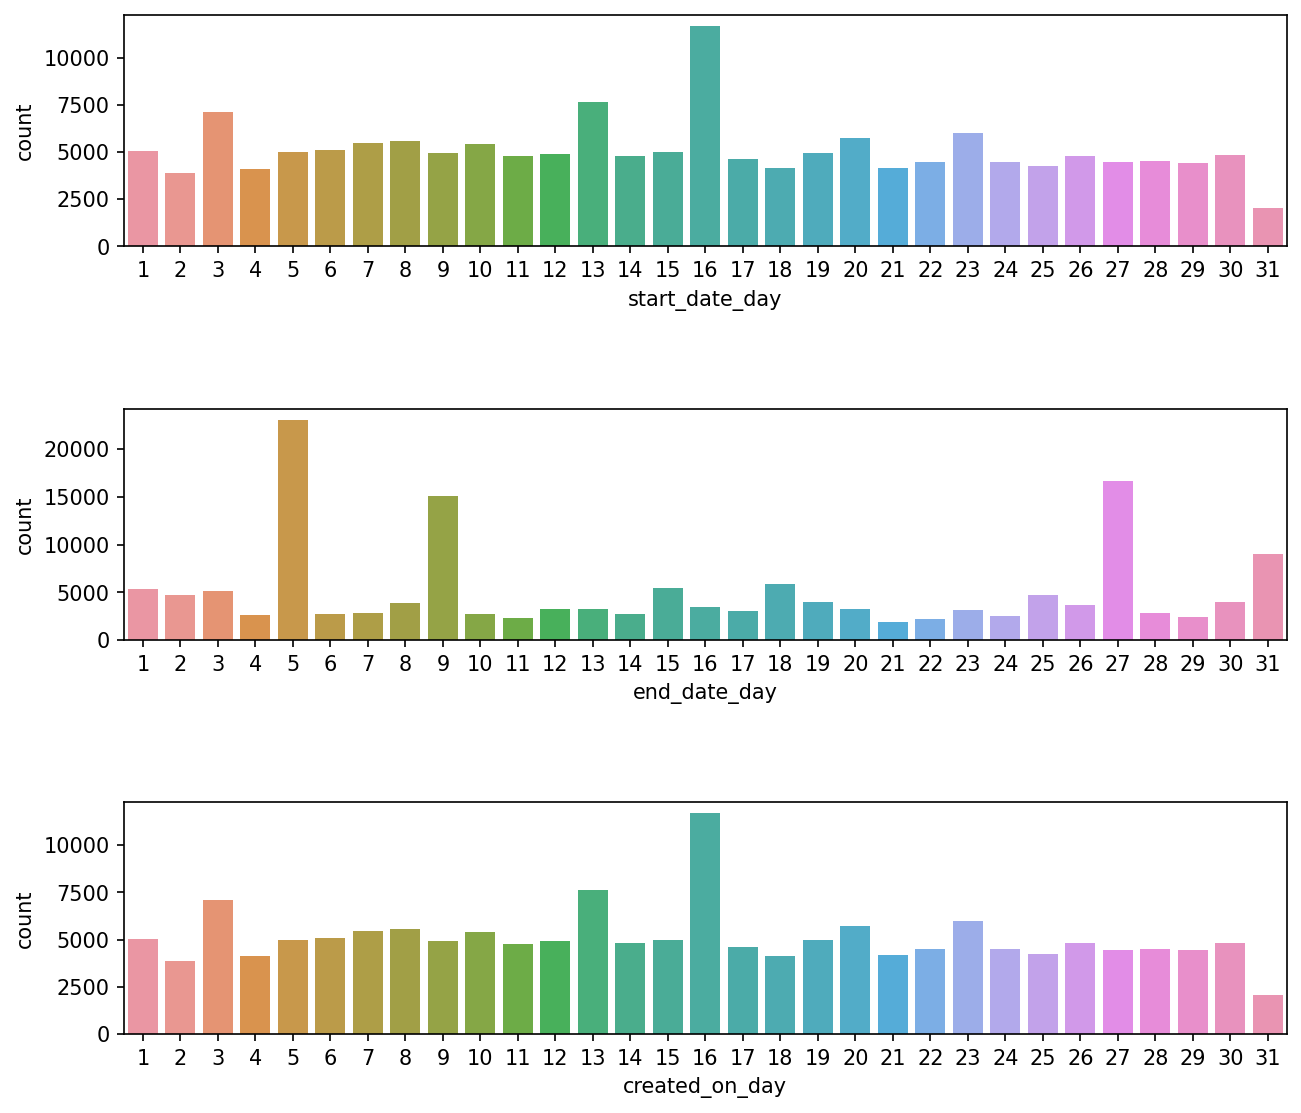

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(10, 9))
sns.countplot(
    x="start_date_day", data=df, ax=axes[0], 
)
sns.countplot(
    x="end_date_day", data=df, ax=axes[1], 
)
sns.countplot(
    x="created_on_day", data=df, ax=axes[2], 
)
plt.subplots_adjust(hspace=0.7)

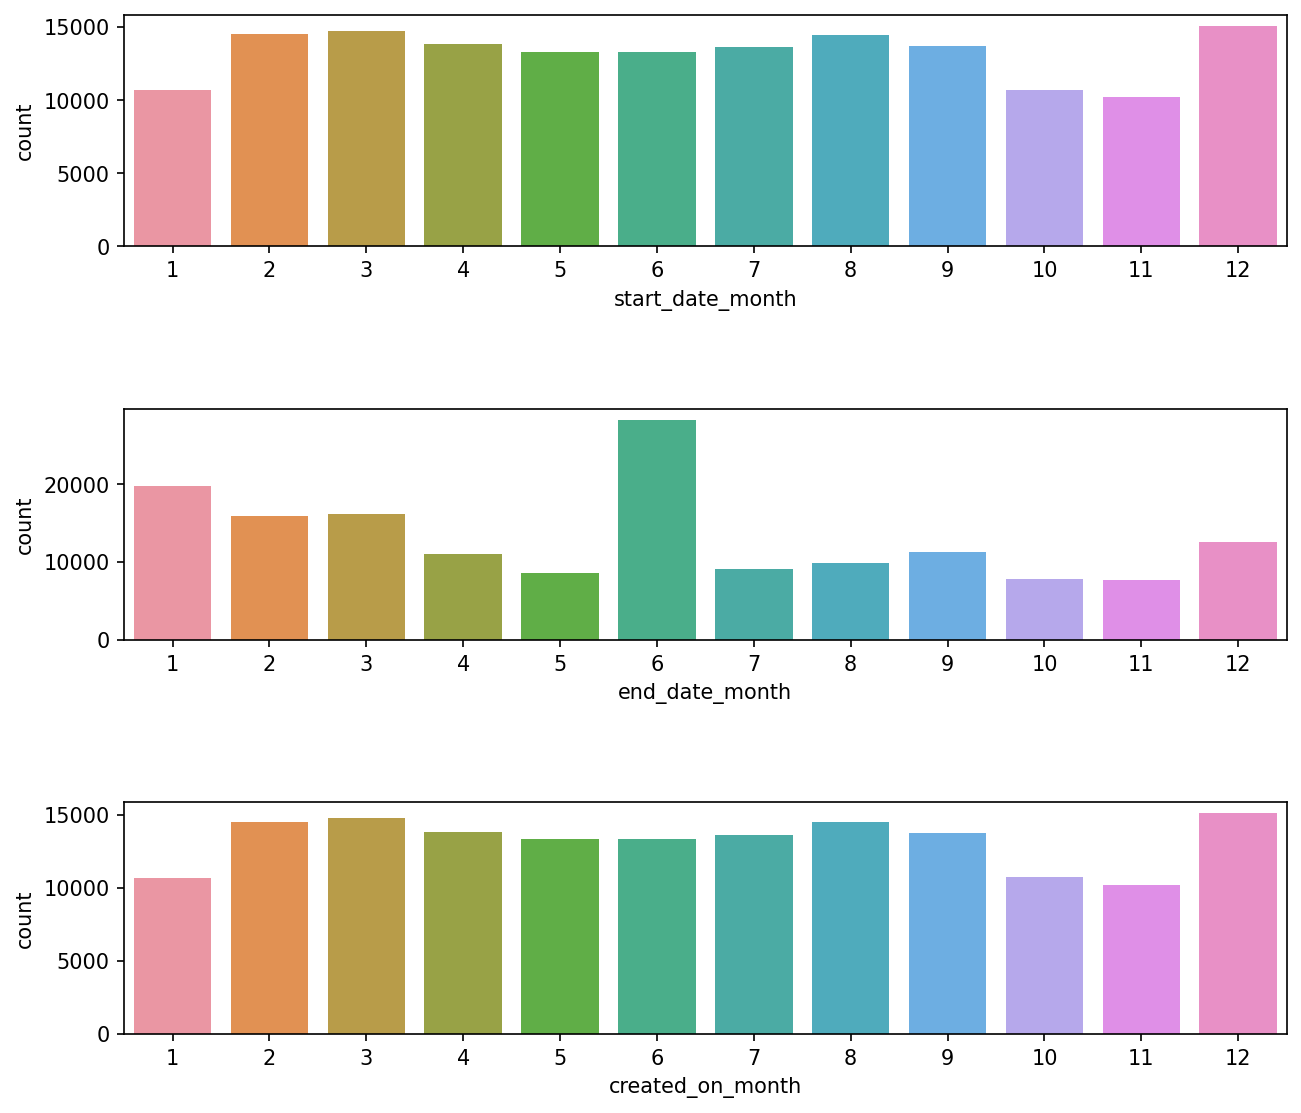

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(10, 9))
sns.countplot(
    x="start_date_month", data=df, ax=axes[0], 
)
sns.countplot(
    x="end_date_month", data=df, ax=axes[1], 
)
sns.countplot(
    x="created_on_month", data=df, ax=axes[2], 
)
plt.subplots_adjust(hspace=0.7)

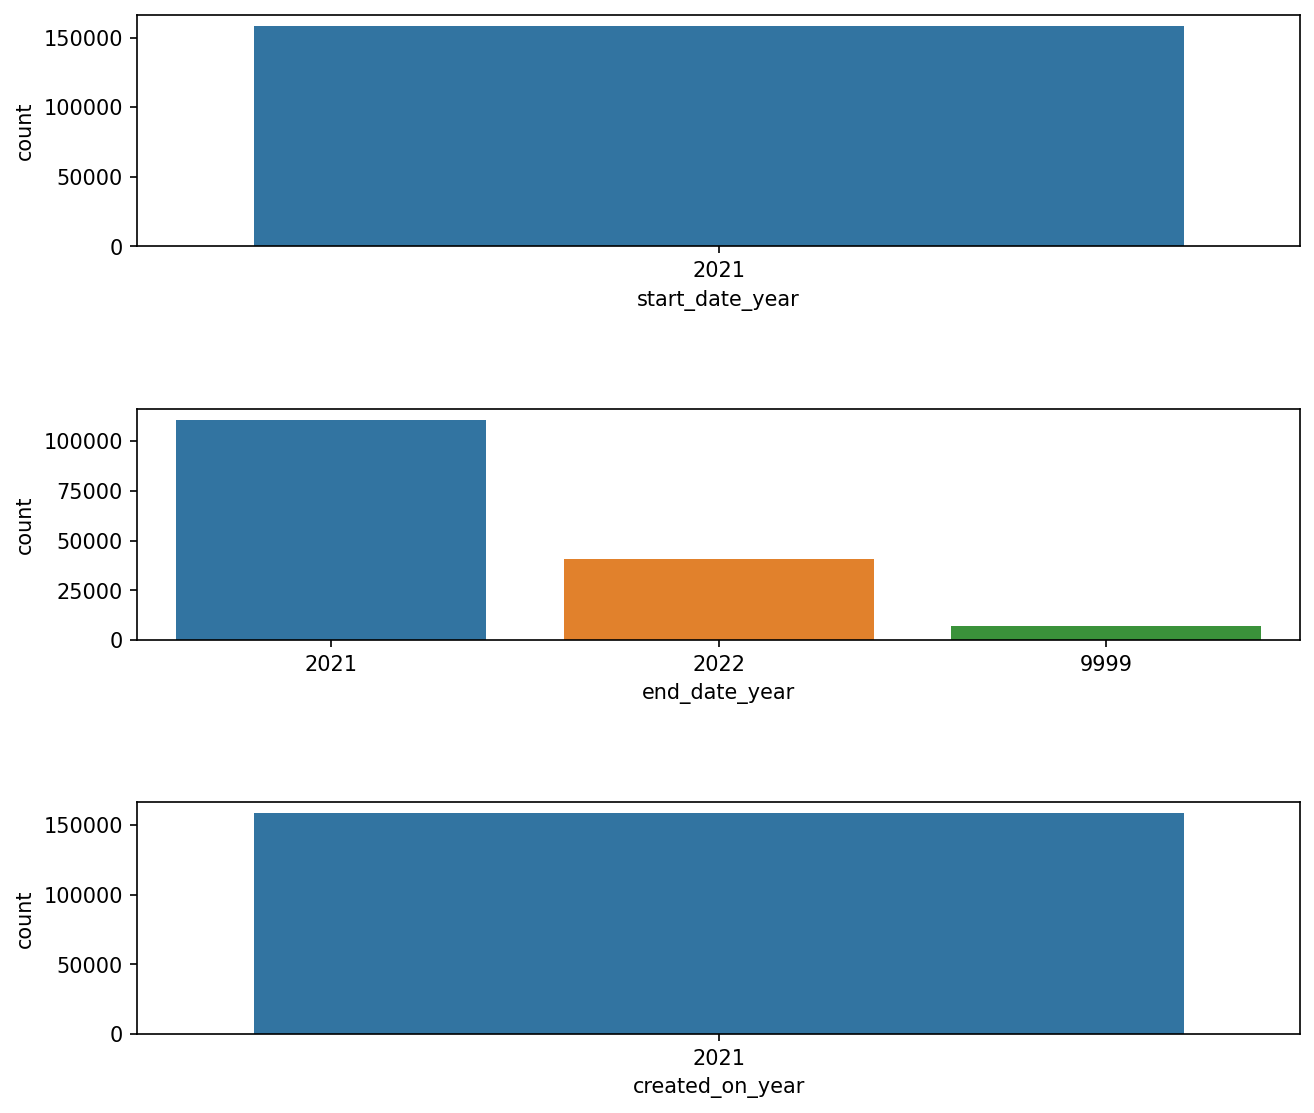

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=150, figsize=(10, 9))
sns.countplot(
    x="start_date_year", data=df, ax=axes[0], 
)
sns.countplot(
    x="end_date_year", data=df, ax=axes[1], 
)
sns.countplot(
    x="created_on_year", data=df, ax=axes[2], 
)
plt.subplots_adjust(hspace=0.7)

Text(0.5, 1.0, 'Latitud')

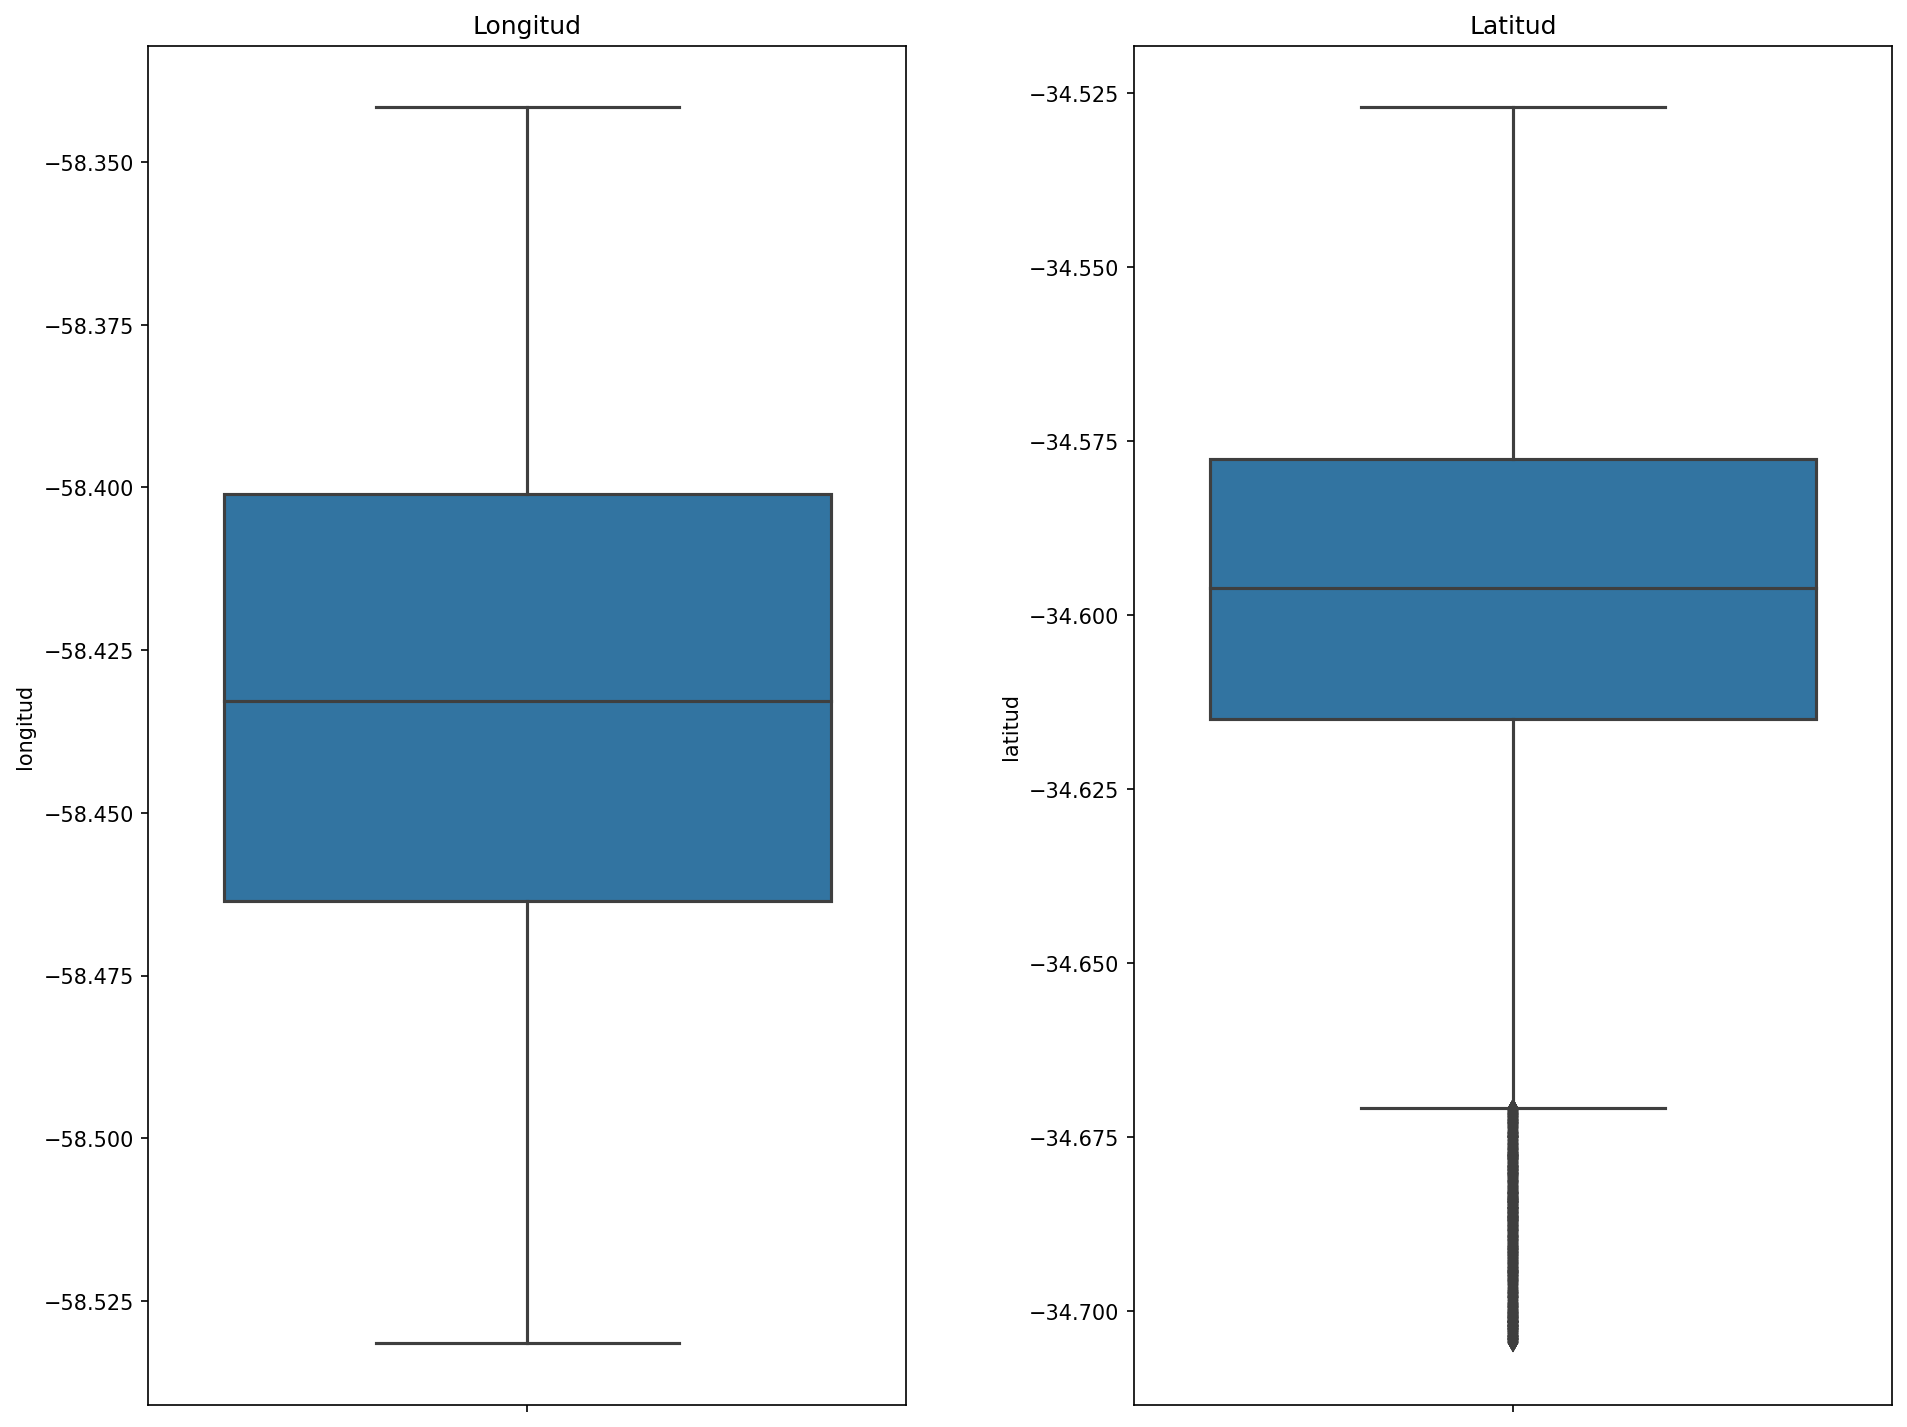

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(15, 12))
sns.boxplot(y=df['longitud'], ax=axes[0])
sns.boxplot(y=df['latitud'], ax=axes[1])
plt.subplots_adjust(wspace=0.3)
axes[0].set_title("Longitud")
axes[1].set_title("Latitud")

<h5 style="color:#FF0000"> Tarea de cada uno. <br> Luego Ctrl + C y Ctrl + V</h5>

<h4 align="center"><b> Analizar las correlaciones existentes entre las variables </b></h4>

<AxesSubplot:xlabel='longitud', ylabel='latitud'>

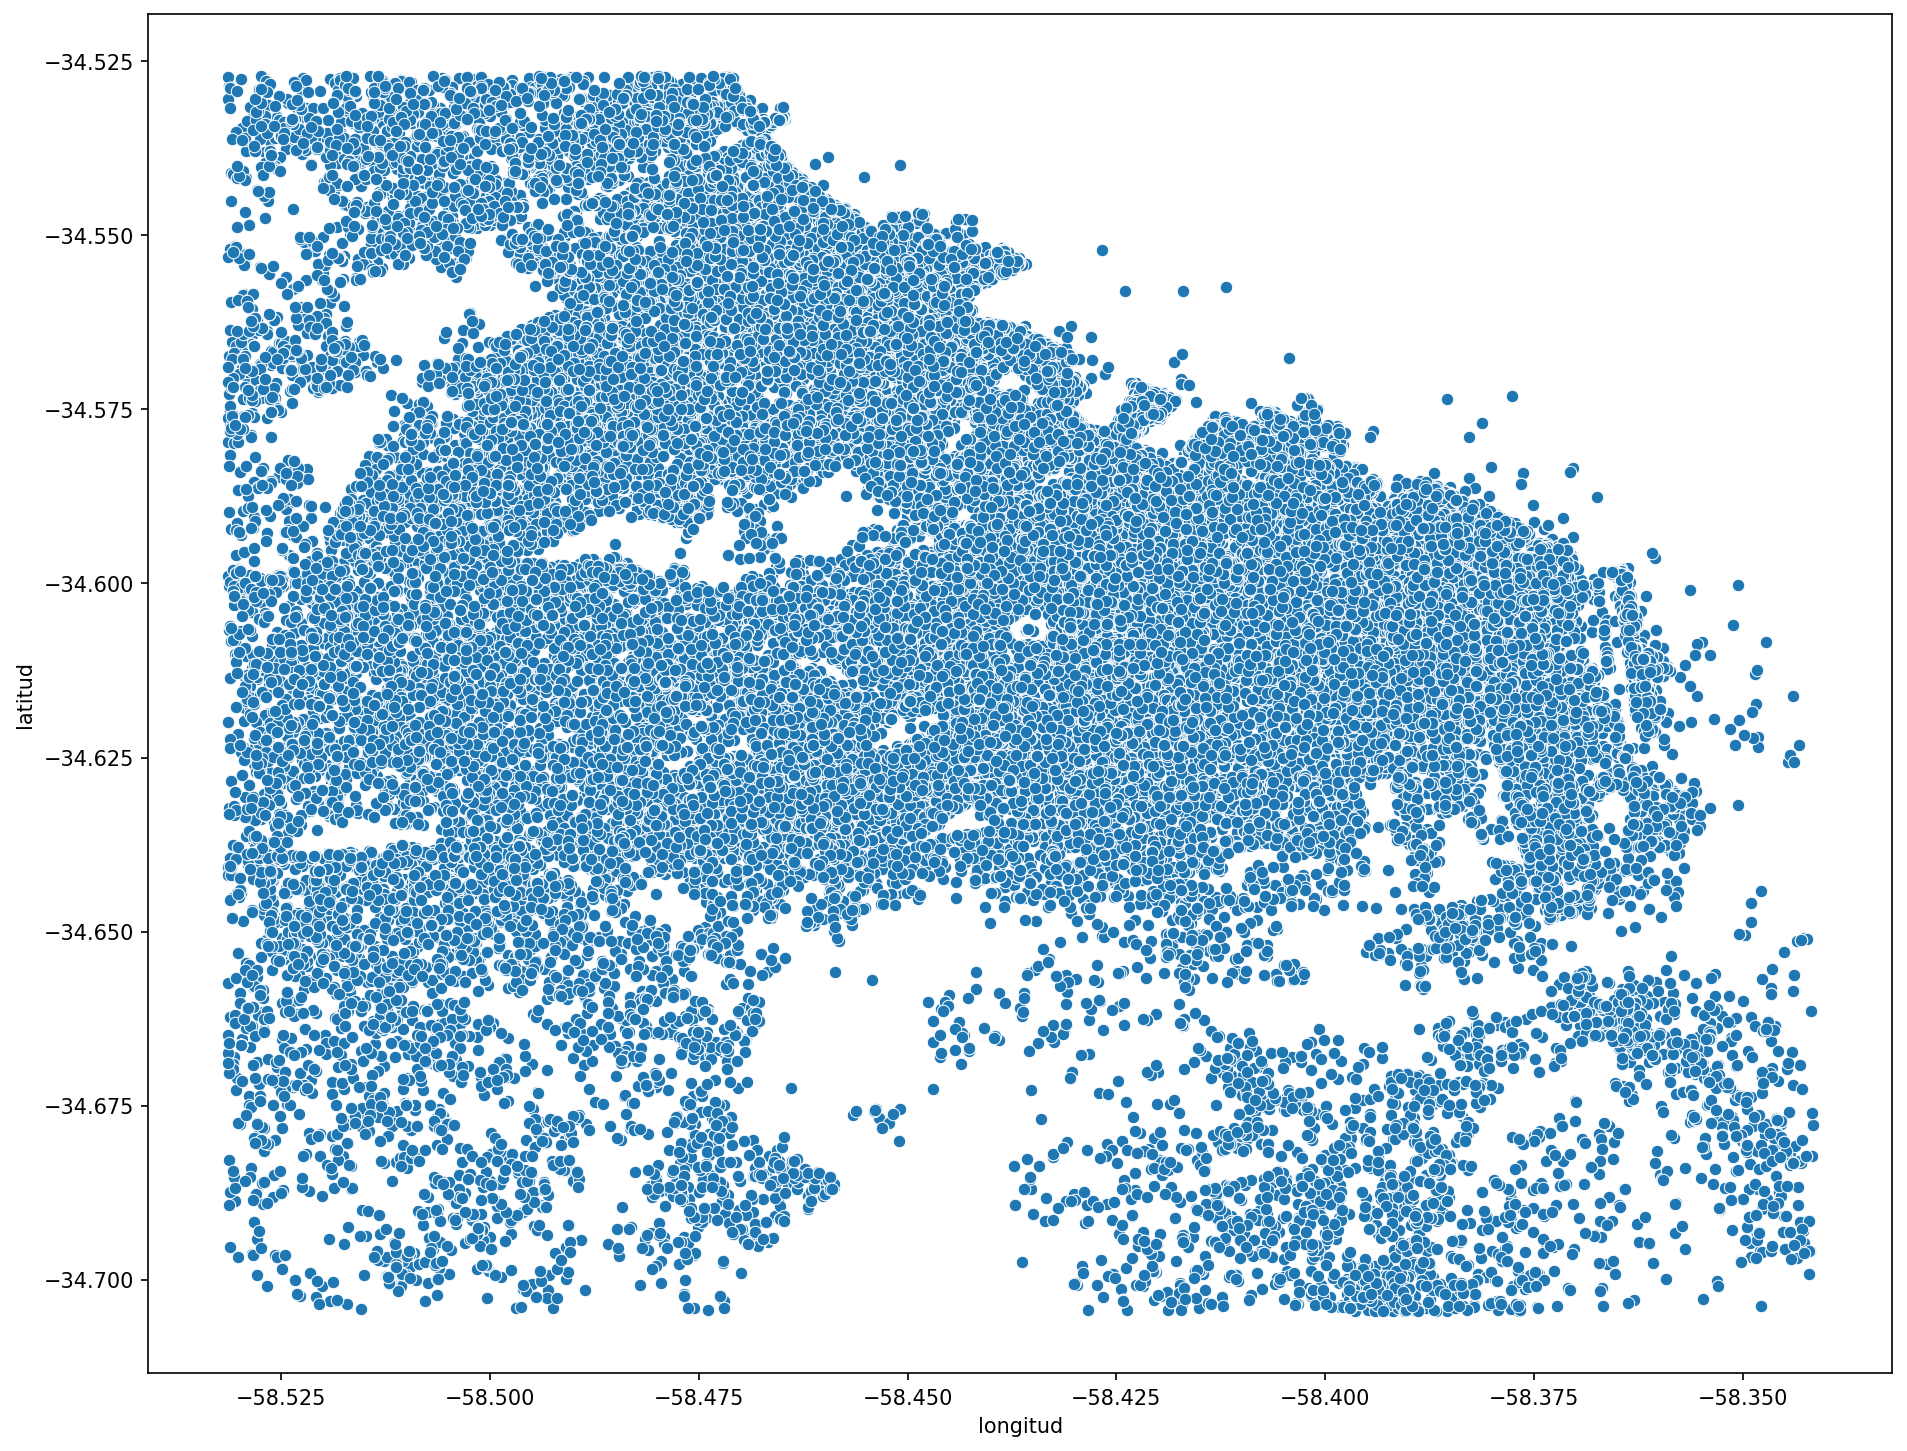

In [27]:
fig, axes = plt.subplots(dpi=150, figsize=(15, 12))
sns.scatterplot(data=df, x="longitud", y="latitud")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158431 entries, 42 to 460145
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   latitud                   158431 non-null  float64
 1   longitud                  158431 non-null  float64
 2   place_l2                  158431 non-null  object 
 3   place_l3                  158349 non-null  object 
 4   place_l4                  12888 non-null   object 
 5   place_l5                  0 non-null       object 
 6   operation                 158431 non-null  object 
 7   property_type             158431 non-null  object 
 8   property_rooms            138131 non-null  float64
 9   property_bedrooms         118581 non-null  float64
 10  property_surface_total    146751 non-null  float64
 11  property_surface_covered  150295 non-null  float64
 12  property_price            155848 non-null  float64
 13  property_currency         155746 non-null  

<h5 style="color:#FF0000"> Tarea de cada uno, investigar si su variable tiene alguna correlacion importante.<br> Luego Ctrl + C y Ctrl + V</h5>

**b) Datos Faltantes:** analizar la presencia de datos faltantes en el dataset
* Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset
* Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de
datos faltantes de cada registro. Realizar un gráfico que permita conocer la
proporción de faltantes por fila en el dataset.
* Determinar, de ser posible, estrategias para reparar los valores faltantes.
* En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes.

<h4 align="center"><b> Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable
el porcentaje de datos faltantes con respecto al total del dataset </b></h4>

In [30]:
na_ratio_column = pd.DataFrame()
na_ratio_column["Percent"] = ((df.isnull().sum() / len(df))*100).sort_values(ascending = False)
na_ratio_column["Count"] =(df.isnull().sum()).sort_values(ascending = False)

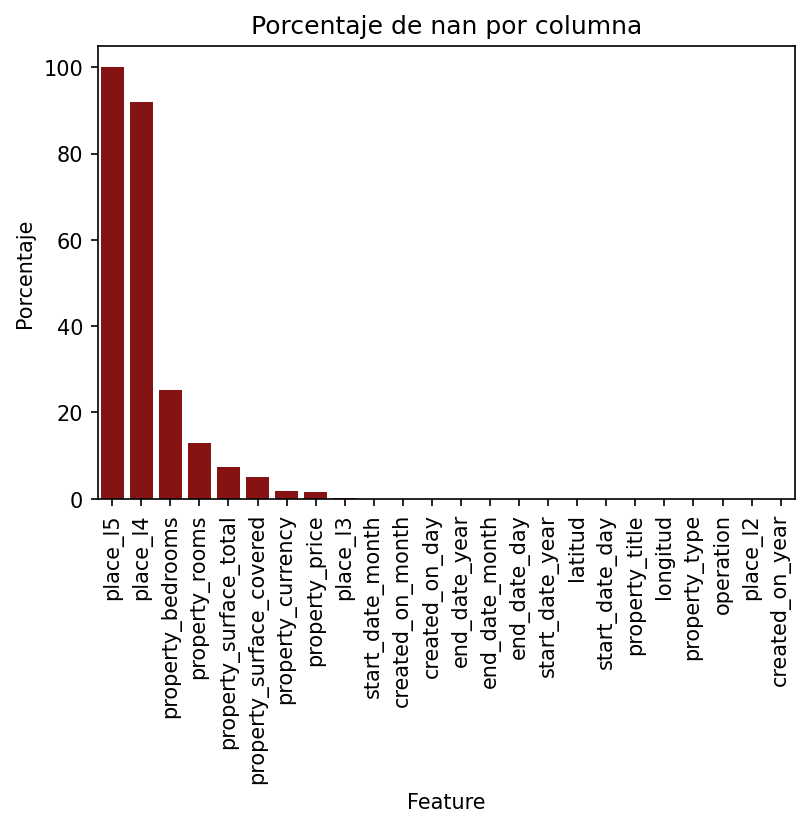

In [31]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Percent'])

plt.figure(dpi=150)
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Porcentaje")
plt.xlabel("Feature")
plt.title("Porcentaje de nan por columna")
plt.xticks(rotation=90)
plt.show()

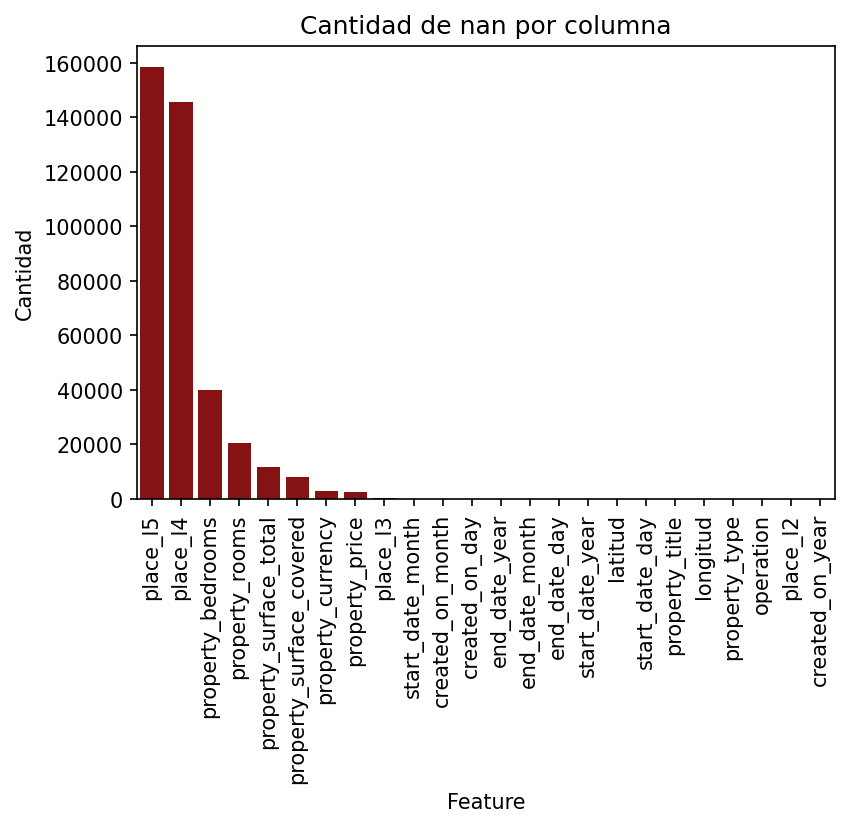

In [32]:
eje_x = na_ratio_column.index
eje_y = list(na_ratio_column['Count'])

plt.figure(dpi=150)
sns_bar_plot=sns.barplot(x=eje_x, y=eje_y, color=(0.6, 0, 0), alpha = 1)
plt.ylabel("Cantidad")
plt.xlabel("Feature")
plt.title("Cantidad de nan por columna")
plt.xticks(rotation=90)
plt.show()

<h4 align="center"><b> Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de faltantes por fila en el dataset </b></h4>

In [33]:
na_ratio_row = pd.DataFrame()
n_column = df.shape[1]
na_ratio_row["Percent"] = df.isnull().sum(axis=1) / n_column
na_ratio_row["Count"] = df.isnull().sum(axis=1)

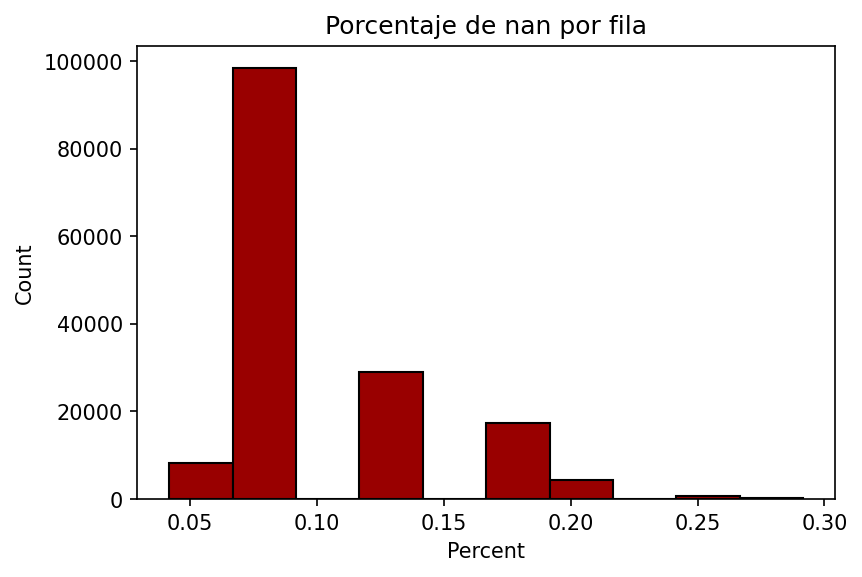

In [34]:
plt.figure(dpi=150)
sns.histplot(data=na_ratio_row, x="Percent", bins=10, color=(0.6, 0, 0), alpha = 1)
plt.title("Porcentaje de nan por fila")
plt.show()

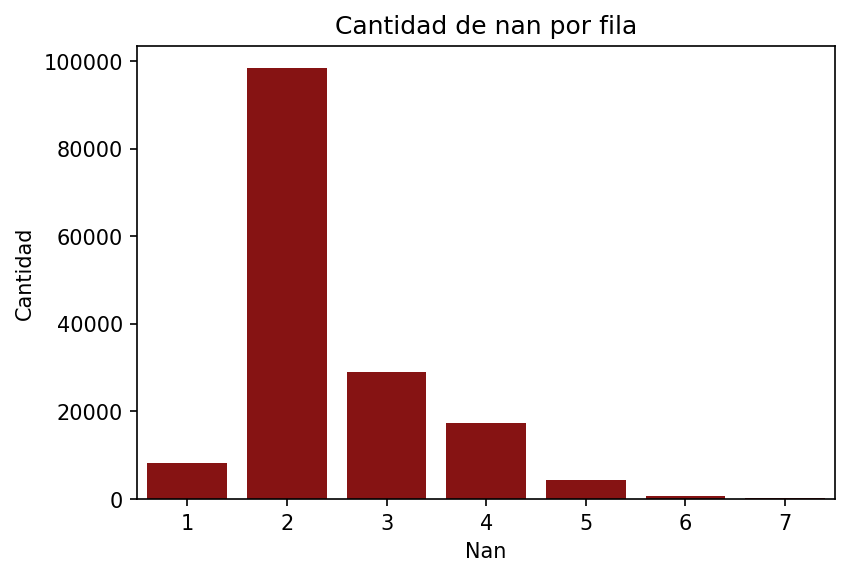

In [35]:
plt.figure(dpi=150)
sns.countplot(
    x="Count", data=na_ratio_row, color=(0.6, 0, 0), alpha = 1
)
plt.ylabel("Cantidad")
plt.xlabel("Nan")
plt.title("Cantidad de nan por fila")
plt.show()

<h4 align="center"><b> Determinar, de ser posible, estrategias para reparar los valores faltantes </b></h4>

Completo las latitutes y longitudes con respecto a la media de su barrio.

In [36]:
medias_latitud = {}
medias_longitud = {}
valores_place = df.groupby(by=['place_l3']).mean().index
grupos = df.groupby(by=['place_l3']).mean()

In [37]:
for place in valores_place:
    medias_latitud[place] = grupos.latitud[place]
    medias_longitud[place] = grupos.longitud[place]

In [38]:
for place in valores_place:
    mask = ((df['longitud'].isnull()) & (df['place_l3'] == place))
    df.loc[mask, 'longitud'] = medias_longitud[place]

In [39]:
for place in valores_place:
    mask = ((df['latitud'].isnull()) & (df['place_l3'] == place))
    df.loc[mask, 'latitud'] = medias_latitud[place]

<h4 align="center"><b> En caso de realizar imputaciones comparar las distribuciones de cada atributo
reparado con la distribución anterior a la imputación de los datos faltantes </b></h4>

In [40]:
# Codigo

<img src="https://www.infobae.com/new-resizer/6Z2ub_JTNhj8x69p5MHcSV8vwVo=/1200x628/filters:format(webp):quality(85)//s3.amazonaws.com/arc-wordpress-client-uploads/infobae-wp/wp-content/uploads/2017/05/12115047/homero-simpson-1920.jpg">

**c) Valores atípicos:** analizar la existencia de valores atípicos
* Detectar valores atípicos en los datos tanto en forma univariada como
multivariada. Realizar gráficos que permitan visualizar los valores atípicos.
* Explicar qué características poseen los datos atípicos detectados.
* Decidir el tratamiento a aplicar sobre los mismos.
* Analizar la relación entre el precio de venta y los metros de superficie ¿hay
valores atípicos que no se detectaron previamente?

Investigo los outliers de latitud

In [41]:
df[df['latitud'] < -34.655].place_l2.unique()

array(['Bs.As. G.B.A. Zona Sur', 'Capital Federal',
       'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Norte'],
      dtype=object)

In [42]:
df.place_l2.unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste',
       'Santa Catarina', 'Buenos Aires Costa Atlántica',
       'Buenos Aires Interior', 'Córdoba', 'Salta'], dtype=object)

In [43]:
df[df['place_l2']=='Salta']

,latitud,longitud,place_l2,place_l3,place_l4,place_l5,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title,start_date_day,start_date_month,start_date_year,end_date_day,end_date_month,end_date_year,created_on_day,created_on_month,created_on_year
394011,-34.573087,-58.377657,Salta,Salta,NaN,NaN,Venta,Casa,5.0,4.0,438.0,250.0,185000.0,USD,CASA + VENTA + B° LA ALBORADA - GRAND BOURG,13,2,2021,18,3,2021,13,2,2021


Es muy raro que Salta, Cordoba esten

<img src="https://media.tenor.com/v19L9wOAWqEAAAAC/homero-preocupado.gif">

Creo que debo filtrar todos los valores que sean place_l2 == 'Capital Federal'

Con respecto al valor 9999 de end_date_year, me imagino que es una propiedad que no esta vendida todavia
asi que pasare su valor a 2023

In [48]:
df.end_date_year.replace({9999:2023}, inplace=True)

In [49]:
df.end_date_year.unique()

array([2021, 2022, 2023])

Mi decision final con respecto a los features latitud, longitud y fechas seria quedarme con los features: latitud, longitud, end_date_year, start_date_month, end_date_month, created_on_month, porque los demas features me parecen irrelevantes como los dias y tambien start_date_year,  created_on_que solo tienen un valor asi que no aportan mucho.

In [ ]:
# Codigo

**d) Reducción de la dimensionalidad:** en este punto se pide crear un nuevo dataset que
resulte de aplicar una reducción de dimensionalidad sobre el dataset que se obtuvo al
finalizar el preprocesamiento.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Nota:** Los ítems a, b, c y d son los mínimos requeridos para esta etapa, cada grupo puede crear
nuevas variables que resulten derivadas de los atributos existentes o que resulten de incorporar
nuevas fuentes de datos.

### **2. Agrupamiento**
En este punto se busca analizar si es posible agrupar los datos en función de algún criterio. Para
esta tarea utilizar el algoritmo K-Means y se deberán realizar los siguientes puntos:
* Analizar la tendencia al *clustering* del dataset.
* Estimar la cantidad apropiada de grupos que se deben formar.
* Evaluar la calidad de los grupos formados realizando un análisis de *Silhouette*.
* Realizar un análisis de cada grupo intentando entender en función de qué
características fueron formados.
* Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que
pertenecen.
* Repetir el análisis anterior, utilizando sólo 3 grupos.

In [ ]:
#df.drop(columns = ['place_l2', 'place_l3', 'place_l4', 'place_l5', 'operation','property_type', 'property_currency', 'property_title'], inplace=True) 

In [ ]:
#df.dropna(inplace=True)

In [ ]:
#df.shape

In [ ]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
#sse = []
#list_k = list(range(1, 10))

#for k in list_k:
    #km = KMeans(n_clusters=k)
    #km.fit(df)
    #sse.append(km.inertia_)

# Grafico el SSE por K
#plt.figure(figsize=(6, 6))
#plt.plot(list_k, sse, '-o')
#plt.xlabel(r'Cantidad de clusters')
#plt.ylabel('SSE')
#plt.show()

In [ ]:
#list_k = list(range(2, 6))

#for n_clusters in list_k:
    #clusterer = KMeans(n_clusters=n_clusters)
    #preds = clusterer.fit_predict(df)

    #score = silhouette_score(df, preds)
    #print ("For n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

For n_clusters =2 silhouette score is 0.9866552436945492
For n_clusters =3 silhouette score is 0.9815471857959548
For n_clusters =4 silhouette score is 0.9773968119930067
For n_clusters =5 silhouette score is 0.9733262488085515

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

### **3. Clasificación**

**a) Construcción del target**

Para esta tarea se debe crear una nueva variable ***tipo_precio*** que tendrá tres categorías:
**alto**, **medio**, **bajo**. Esta nueva variable será nuestra clase en el problema de clasificación.
Para determinar cuándo el tipo_precio de una propiedad es alto, medio o bajo se deberá
analizar el precio por metro cuadrado (pxm2). Se propone evaluar las siguientes
alternativas para establecer los límites de cada categoría:

1. Dividir la variable *pxm2* en 3 intervalos con igual cantidad de observaciones.
2. Dividir la variable pxm2 en 3 intervalos, el primero con el 25% de las observaciones,
el siguiente con el 50% y el último con el 25% de las observaciones restantes.
3. Trabajar la variable pxm2 relativa a cada tipo de propiedad y luego dividirla como en
el punto anterior.

Se pide:
* Mostrar la distribución del precio por metro cuadrado
* Mostrar la distribución del precio por metro cuadrado por tipo de propiedad
* Para cada una de las tres alternativas mostrar gráficamente la distribución de la
nueva variable creada *tipo_precio*.
* Seleccionar una de las alternativas, justificando la misma.
* Comparar, si aplica, la alternativa seleccionada con la división en 3 grupos obtenida
utilizando agrupamiento por K Means.
* Mostrar en un mapa de CABA los avisos coloreados por *tipo_precio*

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**b) Entrenamiento y Predicción**

Predecir el valor del atributo **tipo_precio**, excluyendo del entrenamiento la variable price,
**pxm2** y cualquier otra que pueda contener información del precio de venta. Para todos los
modelos se pide:
* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (*encoding*, normalización, etc)
* Todos los modelos deben ser entrenados también con el *dataset* generado en el
punto **1 d)**


**Modelo 1 : Árbol de decisión**

a. Construir un árbol de decisión y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Graficar el árbol de decisión con mejor performance encontrado en el punto
anterior. Si es muy extenso mostrar una porción representativa.

c. Analizar el árbol de decisión seleccionado describiendo los atributos elegidos, y
decisiones evaluadas (explicar las primeras reglas obtenidas).

d. Evaluar la performance del árbol en el conjunto de evaluación, explicar todas las
métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 2: Random Forest**

a. Construir un clasificador RF y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Analizar la importancia de los atributos

c. Mostrar la conformación final de uno de los árboles generados. Si es muy
extenso mostrar una porción representativa y explicar las primeras reglas.

d. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas y mostrar la matriz de confusión. Comparar con la performance de
entrenamiento.


In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante cross-validation) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación, explicar todas las métricas y mostrar la matriz de
confusión.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

¿Qué modelo elegirían para clasificar el tipo de precio de las propiedades?

R:

### **4. Regresión**

En esta etapa se busca predecir el precio de la propiedad utilizando dos modelos diferentes.
Para todos los modelos se pide:

* Realizar las tareas de ingeniería de características necesarias para trabajar con
cada algoritmo (encoding, normalización, etc)
* Todos los modelos deben ser entrenados también con el dataset generado en el
punto **1 d)**

**Modelo 1: KNN**

a. Construir un modelo [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) para regresión y optimizar sus hiperparámetros
mediante *k-fold Cross Validation* para obtener la mejor performance .¿Cuántos
*folds* utilizaron? ¿Qué métrica consideran adecuada para buscar los parámetros?

b. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas. Comparar con la performance de entrenamiento.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 2: XGBoost**

a. Construir un modelo **XGBoost** y optimizar sus hiperparámetros mediante *k-fold
Cross Validation* para obtener la mejor performance. ¿Cuántos *folds* utilizaron?
¿Qué métrica consideran adecuada para buscar los parámetros?

b. Evaluar la performance del modelo en el conjunto de evaluación, explicar todas
las métricas. Comparar con la performance de entrenamiento.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

**Modelo 3: a elección**

a. En este punto se debe entrenar (mediante *cross-validation*) un modelo elegido
por el grupo. Se debe evaluar su performance en entrenamiento y sobre el
conjunto de evaluación explicando todas las métricas.

In [ ]:
# Codigo

In [ ]:
# Codigo

In [ ]:
# Codigo

¿Qué modelo elegirían para predecir el precio de venta de las propiedades?

R:

### **5. Conclusiones**

Realizar las conclusiones correspondientes al trabajo realizado en su totalidad, destacando
principalmente los aspectos que consideren más relevantes. Comentar brevemente qué otras
opciones hubiesen explorado y quedaron fuera del alcance de este trabajo

R: